In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [2]:
training_data = pd.read_csv("../Data/aps_failure_training_set.csv",na_values="na")
training_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# Preprocessing

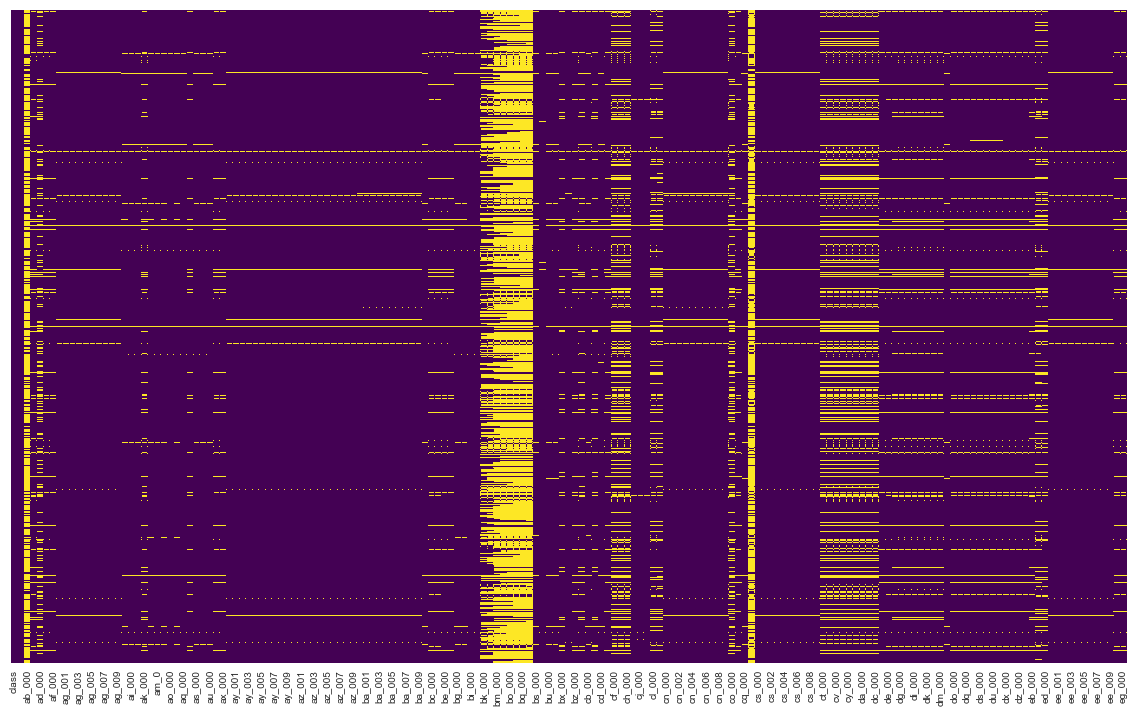

In [3]:
plt.figure(figsize=(20,12))
sns.heatmap(training_data.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

# Missing value handling

We are going to use different approches with missing values:

1. Removing the column having 80% missing values (**Self intuition)
2. Keeping all the features
3. Later, we will try to implement some feature engineering 


**For the rest of the missing values, we are replacing them with their mean() for now (**Ref) 

<big><b>Second Approach</b>

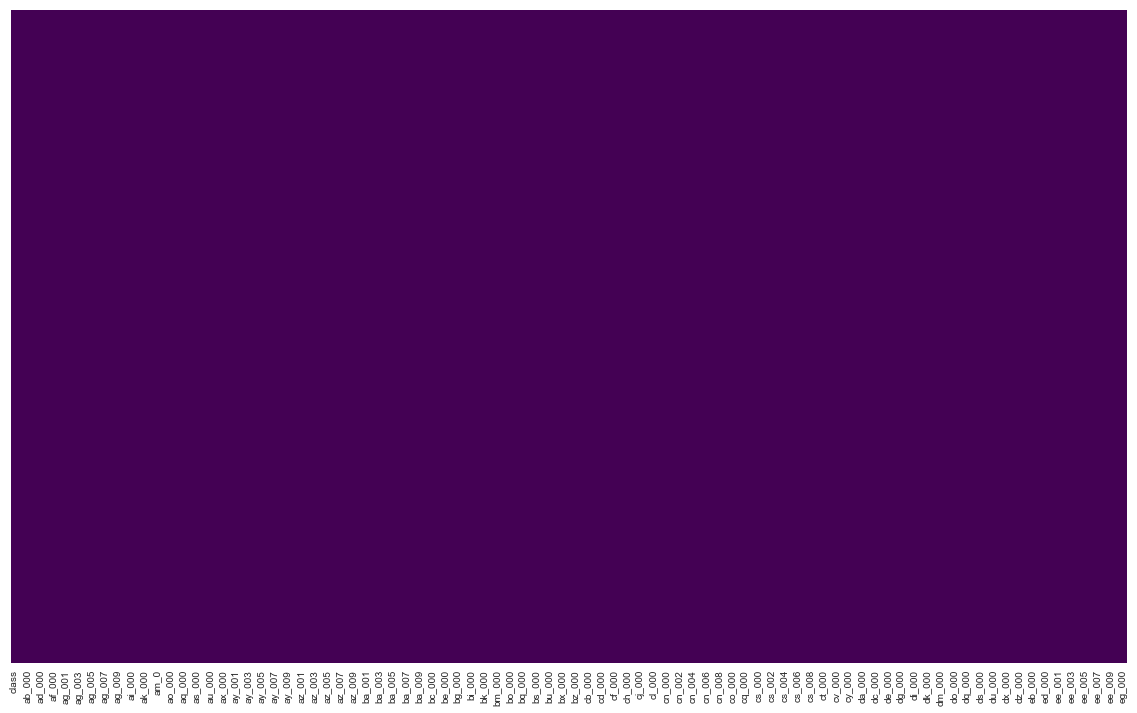

In [4]:
sample_training_data = training_data
sample_training_data.fillna(sample_training_data.mean(),inplace=True)

#after replacing with mean()

plt.figure(figsize=(20,12))
sns.heatmap(sample_training_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
#as all the other values are numerical except Class column so we can replace them with 1 and 0

sample_training_data = sample_training_data.replace('neg',0)
sample_training_data = sample_training_data.replace('pos',1)

sample_training_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# Testing Data preprocessing

In [6]:
testing_data = pd.read_csv("../Data/aps_failure_test_set.csv",na_values="na")
testing_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


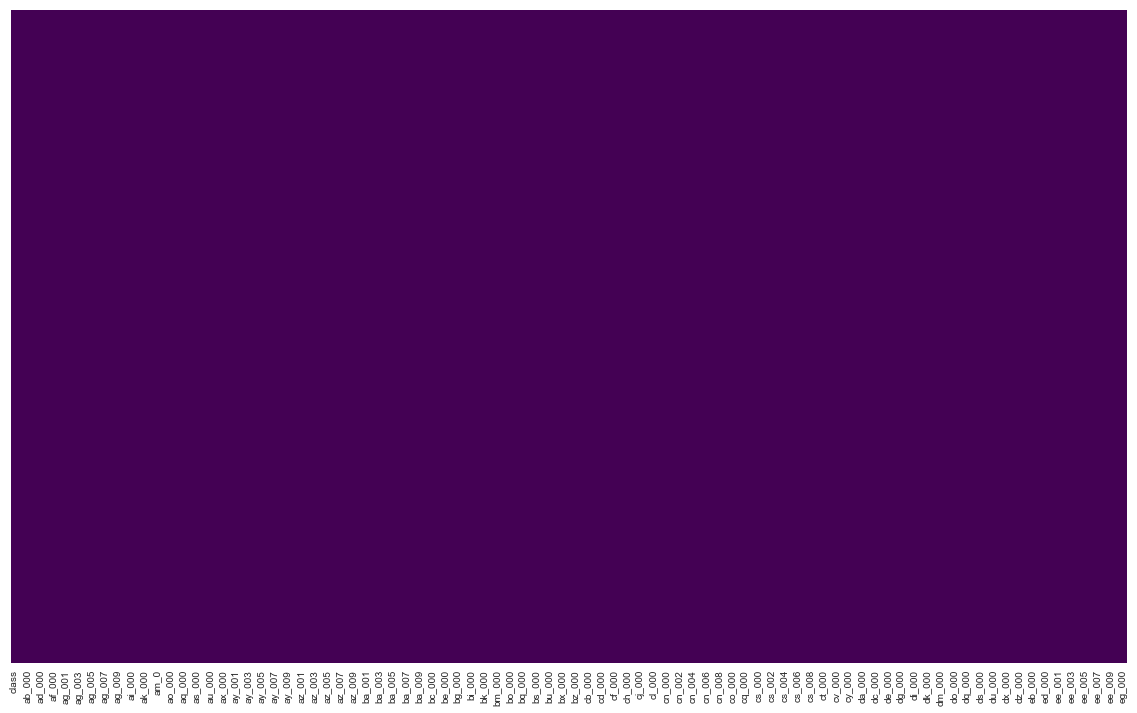

In [7]:
sample_testing_data = testing_data
sample_testing_data.fillna(sample_testing_data.mean(),inplace=True)

#after replacing with mean()

plt.figure(figsize=(20,12))
sns.heatmap(sample_testing_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
#as all the other values are numerical except Class column so we can replace them with 1 and 0

sample_testing_data = sample_testing_data.replace('neg',0)
sample_testing_data = sample_testing_data.replace('pos',1)

sample_testing_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0.000000,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82,0.000000,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002,2.000000,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0,59816,0.772065,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0,1814,0.772065,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


# Model implementation with Cross validation (All features)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=42)

In [10]:
X = sample_training_data.drop('class',axis=1)
y = sample_training_data['class']

In [11]:
CV_prediction = cross_val_predict(rf,X,y,cv = 5)
CV_score = cross_val_score(rf,X,y,cv = 5)

In [12]:
#mean cross validation score  
np.mean(CV_score)

0.9926833333333333

In [13]:
print(classification_report(y,CV_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     59000
           1       0.89      0.64      0.75      1000

   micro avg       0.99      0.99      0.99     60000
   macro avg       0.94      0.82      0.87     60000
weighted avg       0.99      0.99      0.99     60000



In [14]:
tn, fp, fn, tp = confusion_matrix(y, CV_prediction).ravel()
confusionData = [[tn,fp],[fn,tp]]
pd.DataFrame(confusionData,columns=['FN','FP'],index=['TN','TP'])

,FN,FP
TN,58918,82
TP,357,643


In [15]:
cost = 10*fp+500*fn
values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
pd.DataFrame(values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,179320,82,357


In [16]:
print(metrics.accuracy_score(y, CV_prediction))

0.9926833333333334


In [17]:
print(metrics.r2_score(y, CV_prediction)) 

0.5535593220338983


In [18]:
print(metrics.f1_score(y, CV_prediction)) 

0.7455072463768116


In [19]:
print(mean_squared_error(y,CV_prediction))

0.007316666666666667


# Feature Selection

In [20]:
from sklearn.feature_selection import SelectFromModel

In [21]:
rf.fit(X,y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [22]:
rf.feature_importances_

array([2.03191692e-02, 8.00008128e-04, 2.42932381e-03, 1.46425753e-03,
       5.93516599e-04, 4.85679090e-04, 1.80065034e-04, 4.01492112e-02,
       1.72357185e-02, 1.45331499e-02, 1.05811394e-02, 2.88526117e-03,
       4.31827768e-03, 4.89590321e-03, 4.22831282e-03, 4.56336748e-03,
       5.68534624e-03, 8.95653711e-03, 2.65917047e-03, 9.60376275e-05,
       3.32504816e-02, 3.48212143e-02, 5.28184874e-03, 2.43691025e-03,
       2.34525360e-03, 1.22609688e-02, 6.37184816e-04, 3.29619159e-04,
       1.82282767e-03, 1.57895149e-03, 1.57639603e-03, 1.97805953e-03,
       2.57138172e-03, 5.35296077e-03, 5.91529858e-03, 3.75066110e-03,
       7.99883253e-03, 1.45331630e-02, 7.60591097e-03, 6.34803976e-03,
       5.09967759e-03, 8.16736565e-03, 6.07732015e-03, 6.51215485e-03,
       6.61298677e-03, 2.93137135e-03, 4.07254289e-03, 3.79112451e-03,
       2.66651794e-03, 3.62127147e-03, 1.65132879e-03, 1.22489215e-03,
       3.63031220e-03, 4.25422972e-03, 2.29669166e-02, 6.65982793e-03,
      

Text(0.5, 0, 'Variable Importance')

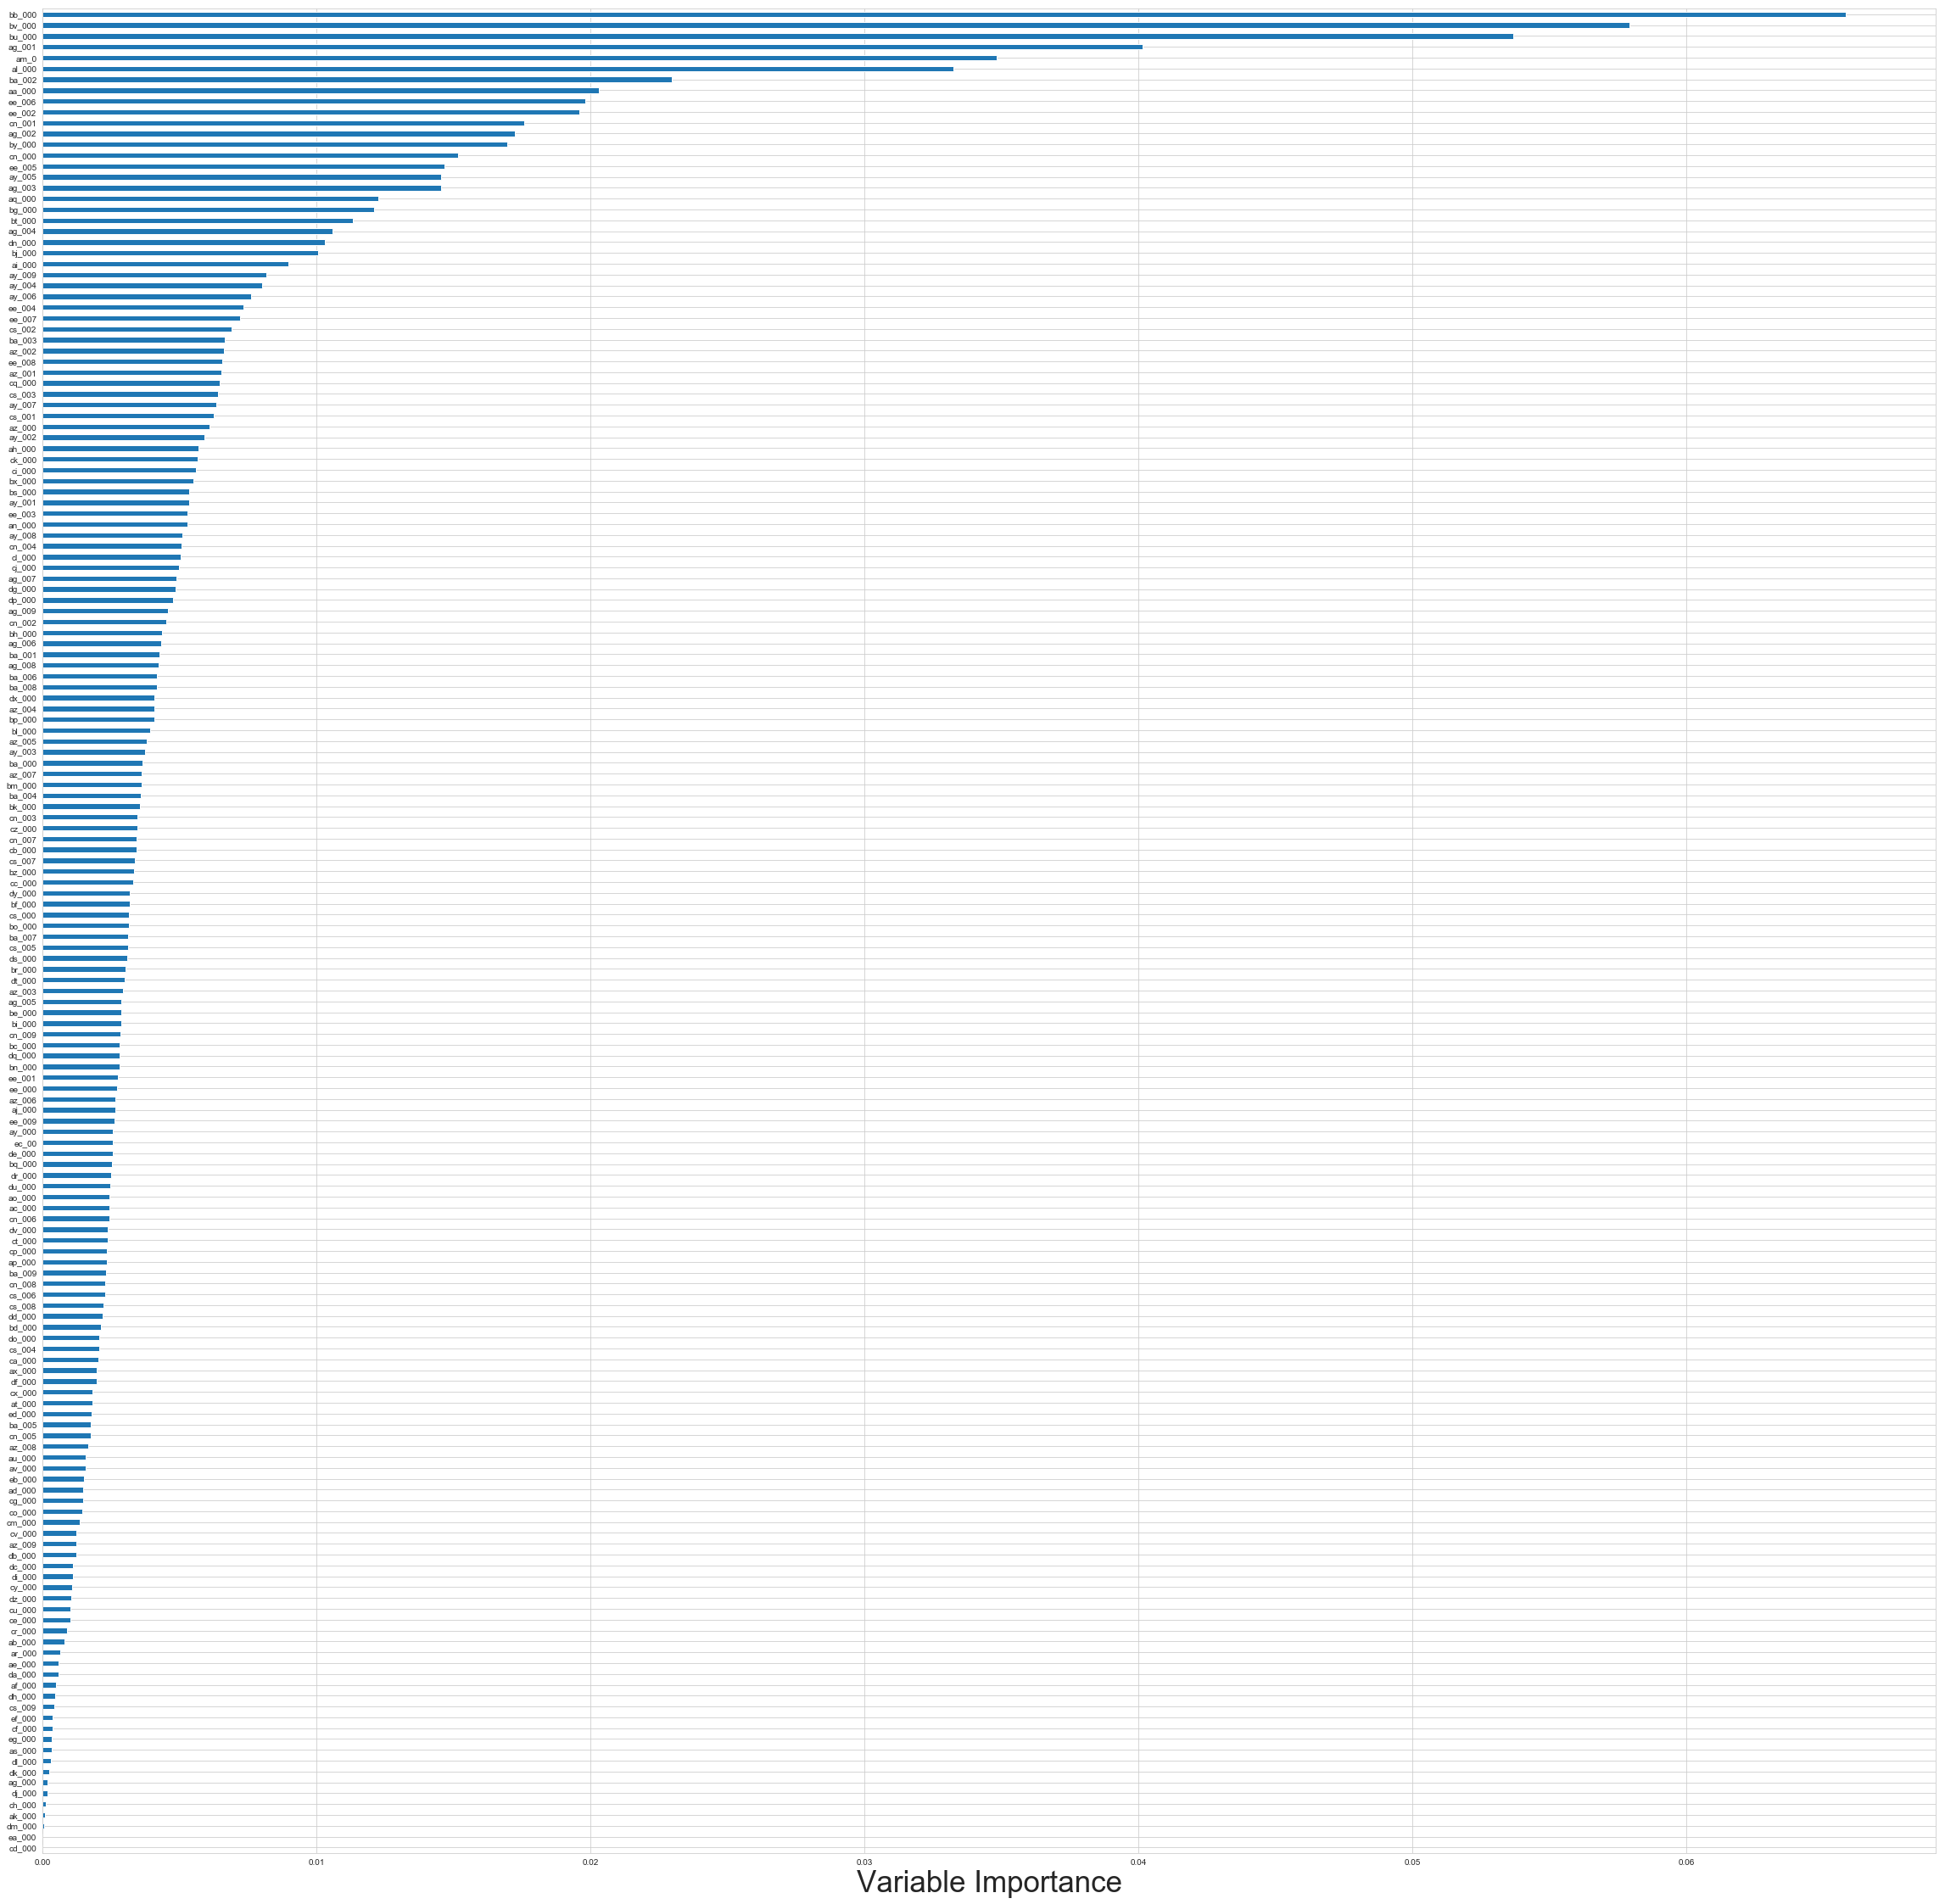

In [23]:
#barplot
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(40,40))
feat_importances.nlargest(170).sort_values().plot(kind='barh')
plt.xlabel('Variable Importance',fontsize=35)

In [24]:
features = X.columns.values
features.tolist()

['aa_000',
 'ab_000',
 'ac_000',
 'ad_000',
 'ae_000',
 'af_000',
 'ag_000',
 'ag_001',
 'ag_002',
 'ag_003',
 'ag_004',
 'ag_005',
 'ag_006',
 'ag_007',
 'ag_008',
 'ag_009',
 'ah_000',
 'ai_000',
 'aj_000',
 'ak_000',
 'al_000',
 'am_0',
 'an_000',
 'ao_000',
 'ap_000',
 'aq_000',
 'ar_000',
 'as_000',
 'at_000',
 'au_000',
 'av_000',
 'ax_000',
 'ay_000',
 'ay_001',
 'ay_002',
 'ay_003',
 'ay_004',
 'ay_005',
 'ay_006',
 'ay_007',
 'ay_008',
 'ay_009',
 'az_000',
 'az_001',
 'az_002',
 'az_003',
 'az_004',
 'az_005',
 'az_006',
 'az_007',
 'az_008',
 'az_009',
 'ba_000',
 'ba_001',
 'ba_002',
 'ba_003',
 'ba_004',
 'ba_005',
 'ba_006',
 'ba_007',
 'ba_008',
 'ba_009',
 'bb_000',
 'bc_000',
 'bd_000',
 'be_000',
 'bf_000',
 'bg_000',
 'bh_000',
 'bi_000',
 'bj_000',
 'bk_000',
 'bl_000',
 'bm_000',
 'bn_000',
 'bo_000',
 'bp_000',
 'bq_000',
 'br_000',
 'bs_000',
 'bt_000',
 'bu_000',
 'bv_000',
 'bx_000',
 'by_000',
 'bz_000',
 'ca_000',
 'cb_000',
 'cc_000',
 'cd_000',
 'ce_000',
 

Text(0.5, 0, 'Variable Importance')

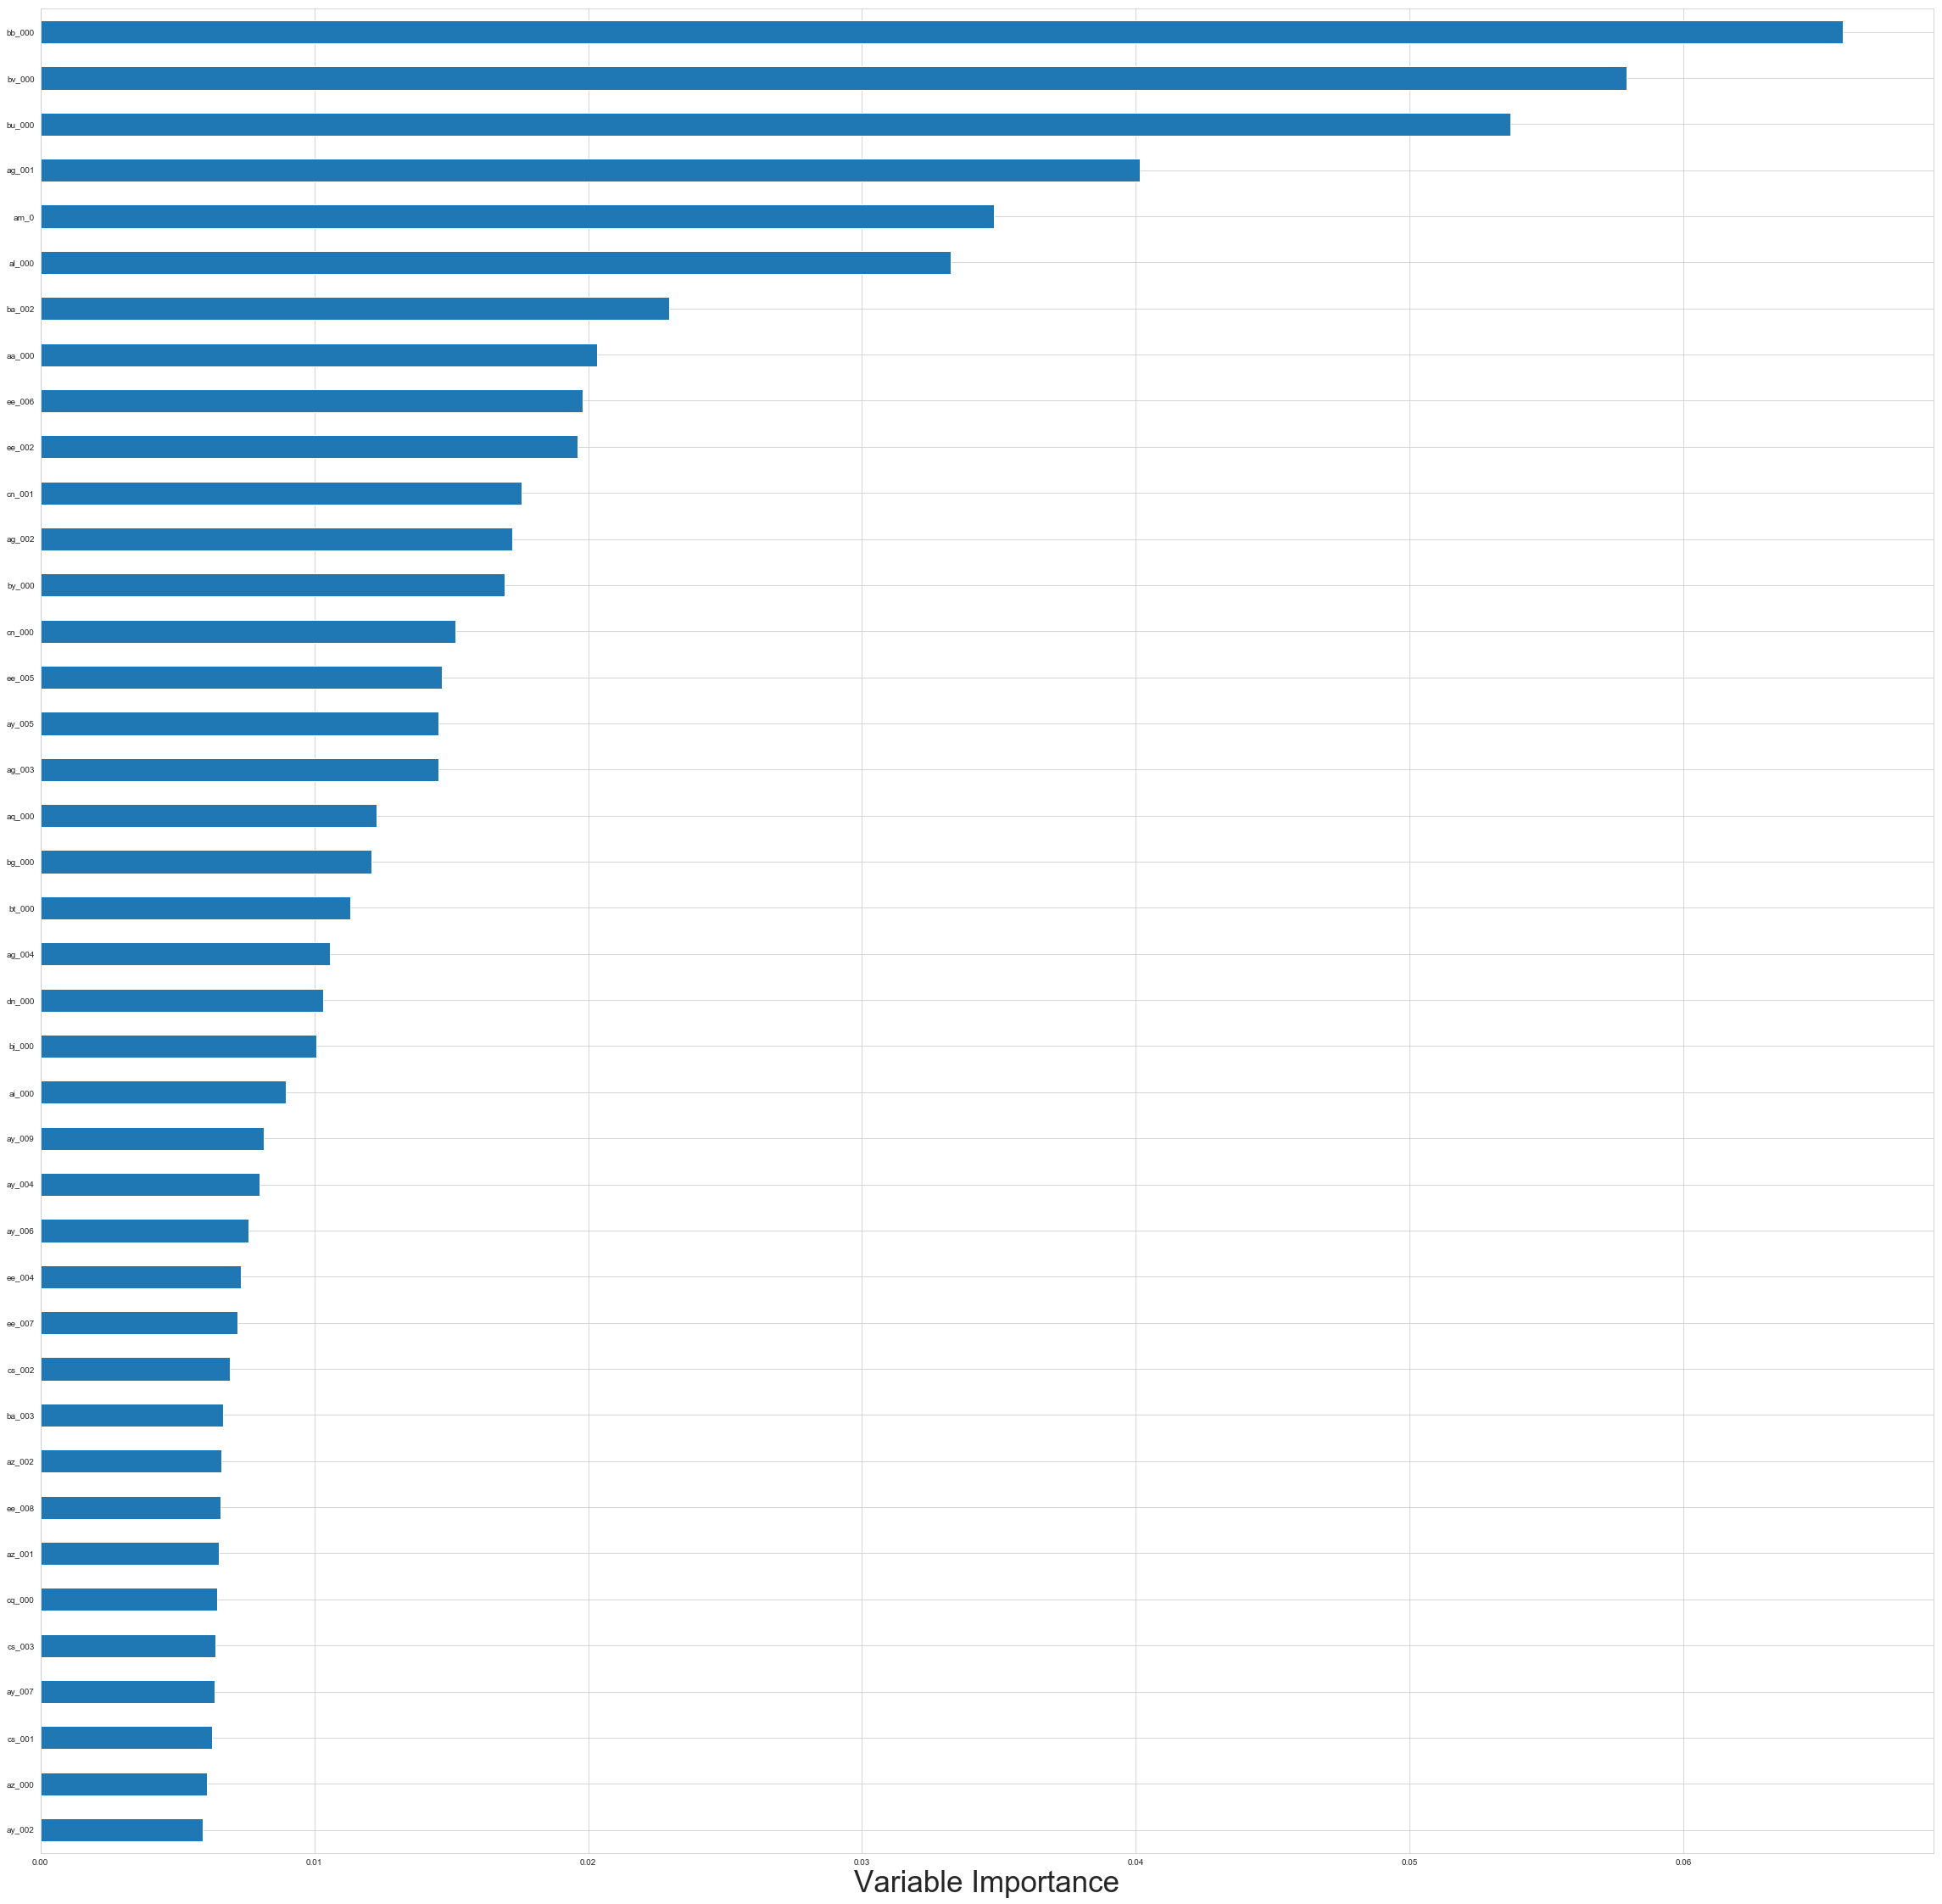

In [25]:
#The top 40 important features
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(40,40))
feat_importances.nlargest(40).sort_values().plot(kind='barh')
plt.xlabel('Variable Importance',fontsize=35)


In [26]:
 model = SelectFromModel(rf, prefit=True)

In [27]:
 X_new = model.transform(X)
 

In [28]:
X=X_new
X.shape

(60000, 40)

In [29]:
#Print the chosen features
features = np.array(features.tolist())
print(features[model.get_support()])

['aa_000' 'ag_001' 'ag_002' 'ag_003' 'ag_004' 'ai_000' 'al_000' 'am_0'
 'aq_000' 'ay_002' 'ay_004' 'ay_005' 'ay_006' 'ay_007' 'ay_009' 'az_000'
 'az_001' 'az_002' 'ba_002' 'ba_003' 'bb_000' 'bg_000' 'bj_000' 'bt_000'
 'bu_000' 'bv_000' 'by_000' 'cn_000' 'cn_001' 'cq_000' 'cs_001' 'cs_002'
 'cs_003' 'dn_000' 'ee_002' 'ee_004' 'ee_005' 'ee_006' 'ee_007' 'ee_008']


# Cross validation with selected features

In [30]:
X = X_new
y = sample_training_data['class']

In [31]:
X.shape

(60000, 40)

In [32]:
CV_prediction = cross_val_predict(rf,X,y,cv = 5)
CV_score = cross_val_score(rf,X,y,cv = 5)

In [33]:
#mean cross validation score  
np.mean(CV_score)

0.9926499999999999

In [34]:
print(classification_report(y,CV_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     59000
           1       0.87      0.66      0.75      1000

   micro avg       0.99      0.99      0.99     60000
   macro avg       0.93      0.83      0.87     60000
weighted avg       0.99      0.99      0.99     60000



In [35]:
tn, fp, fn, tp = confusion_matrix(y, CV_prediction).ravel()
confusionData = [[tn,fp],[fn,tp]]
pd.DataFrame(confusionData,columns=['FN','FP'],index=['TN','TP'])

,FN,FP
TN,58900,100
TP,341,659


In [36]:
cost = 10*fp+500*fn
values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
pd.DataFrame(values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,171500,100,341


In [37]:
print(metrics.accuracy_score(y, CV_prediction))

0.99265


In [38]:
print(metrics.r2_score(y, CV_prediction)) 

0.5515254237288136


In [39]:
print(metrics.f1_score(y, CV_prediction)) 

0.7492893689596362


In [40]:
print(mean_squared_error(y,CV_prediction))

0.00735


In [41]:
#Our cost reduces with the use of selected features

# OOB Curve generation for optimal number of trees

In [42]:
#Now with only 40 features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

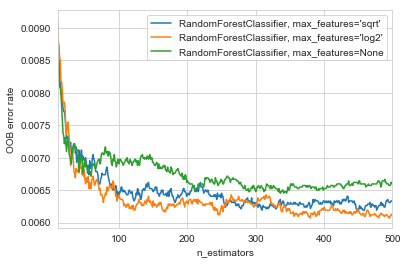

In [43]:
#Determining the optimal n_estimators
from collections import OrderedDict

RANDOM_STATE = 42



# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE,n_jobs=-1)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE,n_jobs=-1)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,warm_start=True, max_features=None,
                                oob_score=True,
                               random_state=RANDOM_STATE,n_jobs=-1))

]
     

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 500
for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)

    plt.plot(xs, ys, label=label)


plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()


In [44]:
## Setting the parameters as per the oob curve
#curve shows the minimum point at approx 380 trees and max_features=log2
rf=RandomForestClassifier(n_estimators=380,max_features='log2',random_state=42,oob_score=True,warm_start=True)

# Cross Validation

In [45]:
CV_prediction = cross_val_predict(rf,X,y,cv = 5)
CV_score = cross_val_score(rf,X,y,cv = 5)

In [46]:
#mean cross validation score  
np.mean(CV_score)

0.9939166666666666

In [47]:
print(classification_report(y,CV_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59000
           1       0.90      0.72      0.80      1000

   micro avg       0.99      0.99      0.99     60000
   macro avg       0.95      0.86      0.90     60000
weighted avg       0.99      0.99      0.99     60000



In [48]:
tn, fp, fn, tp = confusion_matrix(y, CV_prediction).ravel()
confusionData = [[tn,fp],[fn,tp]]
pd.DataFrame(confusionData,columns=['FN','FP'],index=['TN','TP'])

,FN,FP
TN,58917,83
TP,282,718


In [49]:
cost = 10*fp+500*fn
values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
pd.DataFrame(values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,141830,83,282


In [50]:
print(metrics.accuracy_score(y, CV_prediction))

0.9939166666666667


In [51]:
print(metrics.r2_score(y, CV_prediction)) 

0.628813559322034


In [52]:
print(metrics.f1_score(y, CV_prediction)) 

0.7973348139922265


In [53]:
print(mean_squared_error(y,CV_prediction))

0.006083333333333333


# CV=10

In [54]:
CV_prediction2 = cross_val_predict(rf,X,y,cv = 10)
CV_score2 = cross_val_score(rf,X,y,cv = 10)

In [55]:
#mean cross validation score  
np.mean(CV_score2)

0.9940000000000001

In [56]:
print(classification_report(y,CV_prediction2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59000
           1       0.90      0.72      0.80      1000

   micro avg       0.99      0.99      0.99     60000
   macro avg       0.95      0.86      0.90     60000
weighted avg       0.99      0.99      0.99     60000



In [57]:
tn, fp, fn, tp = confusion_matrix(y, CV_prediction2).ravel()
confusionData = [[tn,fp],[fn,tp]]
pd.DataFrame(confusionData,columns=['FN','FP'],index=['TN','TP'])

,FN,FP
TN,58919,81
TP,279,721


In [58]:
cost = 10*fp+500*fn
values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
pd.DataFrame(values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,140310,81,279


In [59]:
print(metrics.accuracy_score(y, CV_prediction2))

0.994


In [60]:
print(metrics.r2_score(y, CV_prediction2)) 

0.6338983050847459


In [61]:
print(metrics.f1_score(y, CV_prediction2)) 

0.8002219755826858


In [62]:
print(mean_squared_error(y,CV_prediction2))

0.006


# Try with test train split

In [63]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=380, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=True)

In [64]:
rf.oob_score_

0.9939285714285714

In [65]:
regularPrediction = rf.predict(X_test)

In [66]:
print(classification_report(y_test,regularPrediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17691
           1       0.89      0.70      0.78       309

   micro avg       0.99      0.99      0.99     18000
   macro avg       0.94      0.85      0.89     18000
weighted avg       0.99      0.99      0.99     18000



In [67]:
print(metrics.accuracy_score(y_test, regularPrediction))

0.9932777777777778


In [68]:
print(metrics.r2_score(y_test, regularPrediction))

0.6015746035091067


In [69]:
print(metrics.f1_score(y_test, regularPrediction))

0.7811934900542495


In [70]:
#testing error
print(metrics.mean_squared_error(y_test, regularPrediction)) 

0.006722222222222222


In [71]:
#Training error
temp = rf.predict(X_train)
mean_squared_error(y_train,temp)

0.0

In [72]:
#confusion matrix
print(confusion_matrix(y_test,regularPrediction))

[[17663    28]
 [   93   216]]


In [73]:
tn, fp, fn, tp = confusion_matrix(y_test,regularPrediction).ravel()
confusionData = [[tn,fp],[fn,tp]]
pd.DataFrame(confusionData,columns=['FN','FP'],index=['TN','TP'])

,FN,FP
TN,17663,28
TP,93,216


In [74]:
#without modified threshold
cost = 10*fp+500*fn
values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
pd.DataFrame(values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,46780,28,93


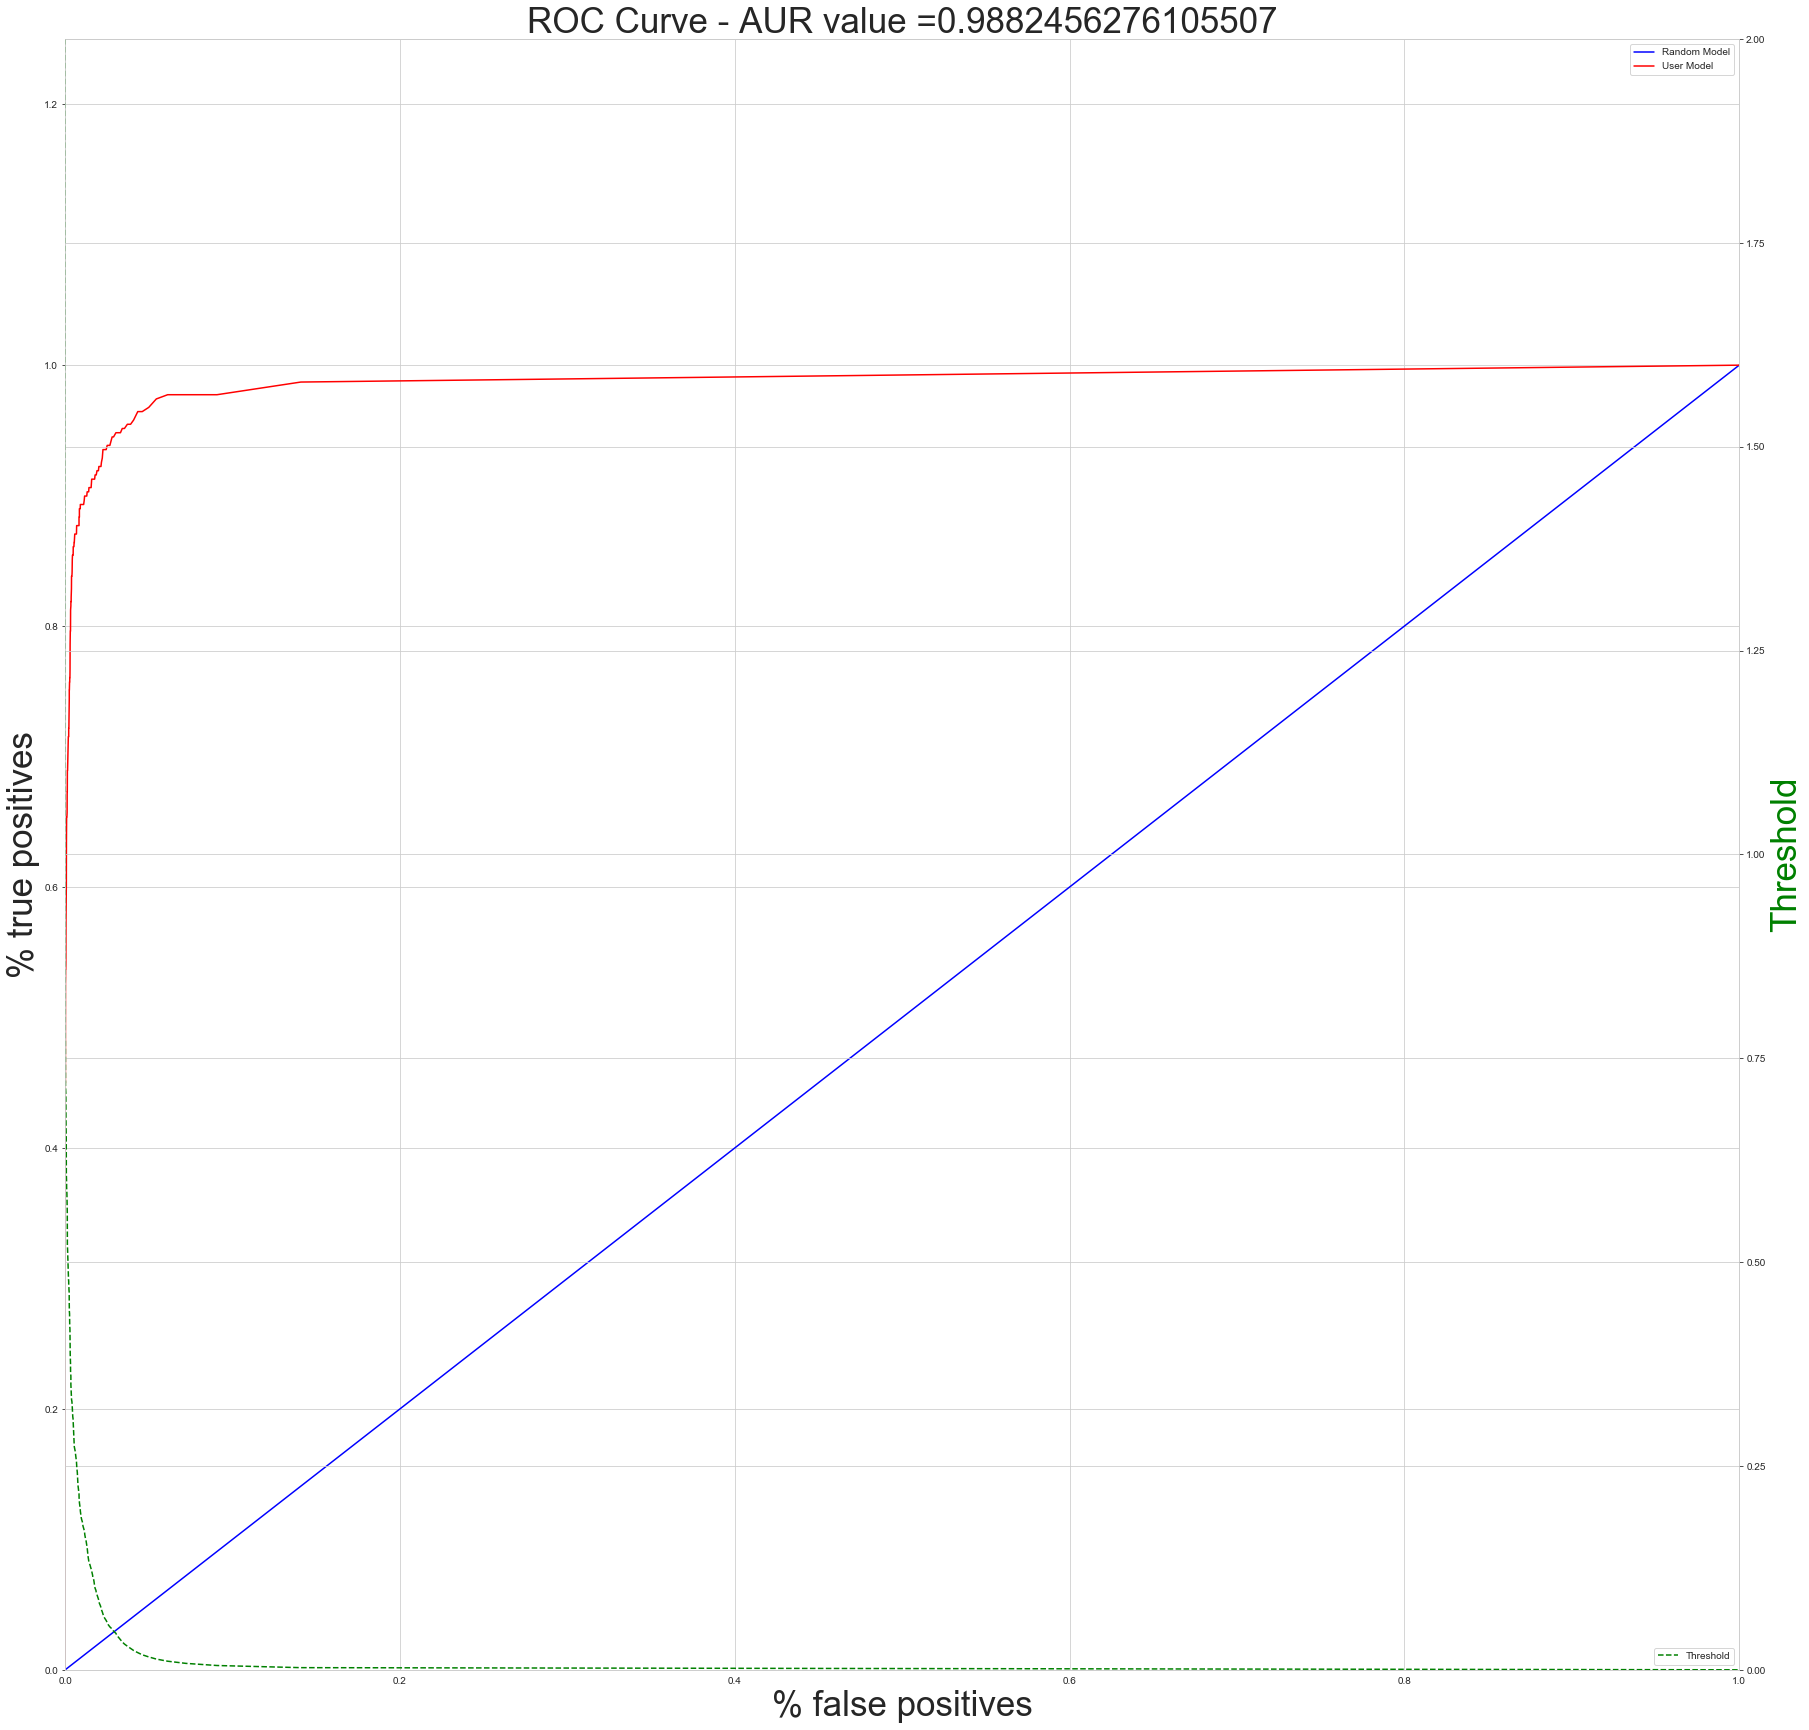

In [75]:

#ROC 

import matplotlib.pyplot as plt
from sklearn import metrics

def roccurve(y_values, y_preds_proba):
    fpr, tpr, thresholds = metrics.roc_curve(y_values, y_preds_proba)
    xx = np.arange(101) / float(100)
    aur = metrics.auc(fpr,tpr)
    plt.figure(figsize=(30,30))
    plt.xlim(0, 1.0)
    plt.ylim(0, 1.25)
  
    
    plt.plot(xx,xx, color='blue', label='Random Model')
    plt.plot(fpr,tpr, color='red', label='User Model')
    plt.title("ROC Curve - AUR value ="+str(aur),fontsize=35)
    plt.xlabel('% false positives',fontsize=35)
    plt.ylabel('% true positives',fontsize=35)
    plt.legend()
  
    # create the axis of thresholds (scores)
    ax2 = plt.gca().twinx()
    ax2.plot(fpr, thresholds, markeredgecolor='g',linestyle='dashed', color='g',label = 'Threshold')
    ax2.set_ylabel('Threshold',color='g',fontsize=35)
    ax2.set_ylim([thresholds[-1],thresholds[0]])
    ax2.set_xlim([fpr[0],fpr[-1]])
    plt.legend(loc="lower right")
    plt.savefig('roc_and_threshold.png')
    plt.show()
    
    
y_pred_proba = rf.predict_proba(X=X_test)
roccurve(y_values=y_test, y_preds_proba=y_pred_proba[:,1])



In [76]:
#with different threshold
THRESHOLD = 0.02 #optimal one chosen manually

thresholdPrediction = (rf.predict_proba(X_test)[:,1] >= THRESHOLD).astype(bool)


tn, fp, fn, tp = confusion_matrix(y_test,thresholdPrediction).ravel()
cost = 10*fp+500*fn
values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
pd.DataFrame(values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,13170,767,11


# Testing Data implementation 

In [77]:
rf.fit(X,y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=380, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=True)

In [78]:
testData_X = sample_testing_data.drop('class',axis=1)
testData_y = sample_testing_data['class']

In [79]:
#Testing data implemented in another file

In [80]:
#trying sampling

from collections import Counter
Counter(sample_testing_data['class'])

Counter({0: 15625, 1: 375})

In [81]:
count_class = pd.value_counts(sample_testing_data['class'])
print(count_class)

0    15625
1      375
Name: class, dtype: int64


Text(0.5, 0, 'Class')

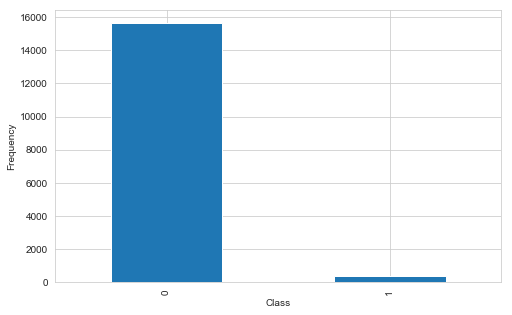

In [82]:
plt.figure(figsize=(8,5))
count_class.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Class')